In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 7. 图像分割

## 7.2 基于阈值的分割方法

### 7.2.1 直方图技术

#### 1. 人工选择

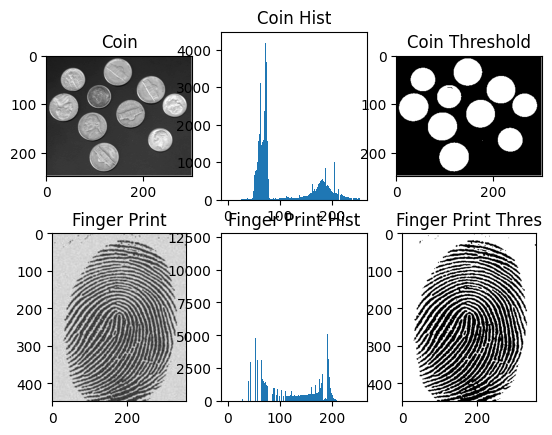

In [7]:
coin = cv2.imread('./png_files/coin.png', 0)
fingerprint = cv2.imread('./png_files/fingerprint.png', 0)

# 代表把coin这张图像所有低于90的像素点全部置0，高于90的像素点全部置255
_, thresh1 = cv2.threshold(coin, 90, 255, cv2.THRESH_BINARY)

# 代表把fingerprint这张图像所有低于120的像素点全部置0，高于9120的像素点全部置255
_, thresh2 = cv2.threshold(fingerprint, 120, 255, cv2.THRESH_BINARY)

plt.figure()

plt.subplot(231)
plt.title('Coin')
plt.imshow(coin, cmap='gray')

plt.subplot(232)
plt.title('Coin Hist')
plt.hist(x=coin.flatten(), bins=range(0,255))

plt.subplot(233)
plt.title('Coin Threshold')
plt.imshow(thresh1, cmap='gray')

plt.subplot(234)
plt.title('Finger Print')
plt.imshow(fingerprint, cmap='gray')

plt.subplot(235)
plt.title('Finger Print Hist')
plt.hist(x=fingerprint.flatten(), bins=range(0,255))

plt.subplot(236)
plt.title('Finger Print Thres')
plt.imshow(thresh2, cmap='gray')

plt.show()

#### 2. 基于直方图技术的迭代式阈值算法

coin.png: 迭代完成，共迭代4次，最终阈值：126.37864461790532
fingerprint.png: 迭代完成，共迭代6次，最终阈值：124.47568975673813


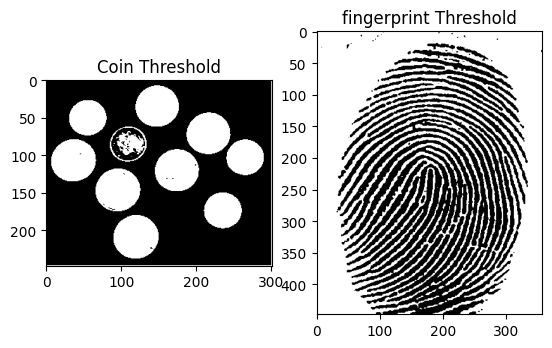

In [19]:
def hist_iter(image):
    
    # 1. 选择一个初始阈值，图像灰度的中值
    T = 80

    num_of_iters = 0
    while True:

        num_of_iters += 1

        T_prev = T

        # 2. 初始阈值将图像像素分为两组，记为G1和G2
        G1 = image[image <= T]
        G2 = image[image >  T]

        # 3. 计算区域G1和G2的平均灰度u1,u2
        u1 = np.average(G1)
        u2 = np.average(G2)

        # 4. 计算新的阈值 T = 0.5(u1+u2)
        T = 0.5 * (u1+u2)

        # 5. 计算新阈值与老阈值的差，如果小于0.0001，则停止循环
        if T - T_prev < 0.0001:
            break
    
    return T, num_of_iters

coin = cv2.imread('./png_files/coin.png', 0)
fingerprint = cv2.imread('./png_files/fingerprint.png', 0)

T_coin, coin_iters = hist_iter(coin)
T_fp, fp_iters = hist_iter(fingerprint)

print('coin.png: 迭代完成，共迭代{}次，最终阈值：{}'.format(coin_iters, T_coin))
print('fingerprint.png: 迭代完成，共迭代{}次，最终阈值：{}'.format(fp_iters, T_fp))

_, thresh1 = cv2.threshold(coin, T_coin, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(fingerprint, T_fp, 255, cv2.THRESH_BINARY)

plt.figure()
plt.subplot(121)
plt.title('Coin Threshold')
plt.imshow(thresh1, cmap='gray')
plt.subplot(122)
plt.title('fingerprint Threshold')
plt.imshow(thresh2, cmap='gray')
plt.show()

### 7.2.2 最小误差阈值法

见PPT

### 7.2.3 最大类间方差阈值法

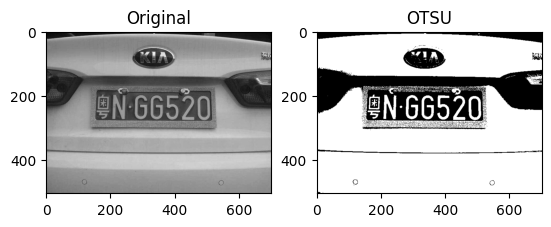

In [21]:
'''仍然是直接调用cv2.threshold()方法即可
   但是，使用OSTU时，请将最后一个参数修改为cv2.THRESH_OTSU'''
img = cv2.imread("./png_files/plate.png", 0)  

_, img_OTSUed = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)  


plt.figure()
plt.subplot(121)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.title('OTSU')
plt.imshow(img_OTSUed, cmap='gray')
plt.show()

不使用cv2.threshold()方法，你能一步一步地使用Python和numpy将算法编码实现吗？